<a href="https://colab.research.google.com/github/choisangh/STUDY/blob/main/ML/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 회귀분석 개념
ref : https://movefast.tistory.com/302
* 예제 코드 사용 데이터셋: 보스턴 주택 가격  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# boston 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1-1. 선형 회귀
ref : https://steadiness-193.tistory.com/270?category=964168

### 개념
* 데이터를 가장 잘 설명해내는 직선을 찾아내는 것.

* 데이터가 분포되어 있는 공간에서 데이터를 가장 잘 표현하는 선을 긋는 것.

* 가장 적합간 기울기(가중치, 계수)와 y절편(편향)을 찾아내는 것.

<img src="https://blog.kakaocdn.net/dn/bzUpsr/btrwsImIFBK/MMed37olMaXCd3Kq44R790/img.png">

### 다중 선형 회귀
보통 데이터셋은 2개 이상의 feature를 갖고 있기 때문에 단순 선형회귀에 대한 개념은 생략한다.
* <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbJ2rte%2FbtqIH5K33oO%2FwWhfciZDSQJPSYVSoth0O1%2Fimg.png"></img>
* ŷ : 예측값
* x : 독립변수, 특성으로 부르지만 여기선 특성(feature)으로 통일한다.
* w : 기울기 또는 회귀계수(coefficient) 또는 가중치. 
* b : y절편 또는 편향.

위 식에서 특성은 총 n+1개이므로 가중치도 n+1개가 필요하다.
주어진 여러 개의 샘플들의 n+1개의 특성들과 라벨값(y) 사이의 관계를 잘 설명해내는 적합한 가중치들 (w0, w1, ..., wn)과 편향(b)를 찾아내야 한다.

회귀모델은 실제 라벨 값 y와 예측 값 ŷ의 차이인 잔차를 제곱한 평균인 MSE를 통해 가중치와 편향을 찾는다.

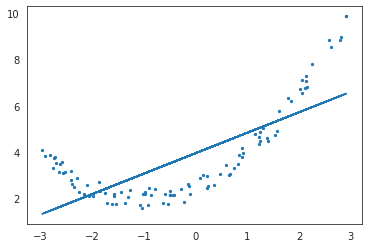

In [ ]:
#선형 회귀 그래프
from sklearn.linear_model import LinearRegression
n = 100
x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(n, 1)
lr=LinearRegression()
lr.fit(x, y)
y_preds=lr.predict(x)
plt.plot(x, y_preds)
plt.scatter(x, y, s=5)

* 최적화된 선형 회귀 모델은 위와 같은 데이터 분포에서 Target의 예측값과 실제값 잔차가 가장 적은 직선을 그린 것이다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwCvOz%2FbtqIwEn8dmC%2FUUIjZBCxnRY2y2O8qeWGNK%2Fimg.png"></img><br>
잔차의 이해를 돕기 위해 단순선형회귀그래프를 이용함
<br>
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbmrTSs%2FbtqIwYG336g%2FMEbqLRKXv20sciZglC4KU0%2Fimg.png"></img><br>
위 상황에서 MSE의 값은 0.4

## 1-2. 다항 회귀
ref : https://inuplace.tistory.com/515

### 개념

* 항이 여러 개인 가설 함수(ex. y=w1*x²+b)로 결과를 예측하는 회귀 분석 방법이다.

* 항은 제곱근이나 2차항, 3차항 등 다양하게 있으며 함수의 형태가 비선형이라는 특징이 있다.

* 다항 회귀를 활용하는 한 가지 방법은 서로 다른 두 Feature 를 하나의 feature로 만들어서 해당 feature를 입력으로 2차 이상의 함수를 예측하는 것이다.

    - 예를 들어, 부동산에서 집값 예측 시 땅의 가로/세로 길이가 주어졌을 때 면적(=가로*세로)으로 만들어서 면적에 따른 결과를 예측하기

    - 새 feature 에 대해 그래프를 그렸을 때 데이터를 잘 표현하는 비선형 함수를 찾아야 한다.

    - 새 feature 에 대해서도 feature scaling 을 적절히 해주어야 한다. 특히, 실수의 곱이나 범위가 큰 두 feature의 곱은 너무 0에 가깝거나 너무 큰 수가 되버릴 수 있다.

* 보통 2차함수는 중간에 하강하므로 3차(cubic) 함수부터 아니면 단조증가하는 제곱근이나 로그 함수를 많이 쓴다.

<img width="500" src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FI5kYW%2FbtqWjq4CRxM%2FNnMnMm35qhqESp6HGQ7Of0%2Fimg.png"></img>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline   
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

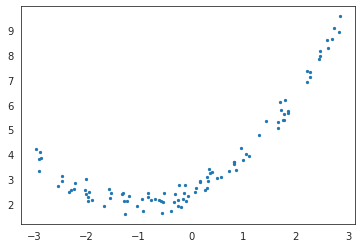

In [ ]:
n = 100

x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(n, 1)

plt.scatter(x, y, s=5)

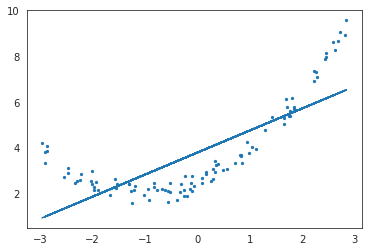

In [ ]:
#선형 회귀 그래프
lr=LinearRegression()
lr.fit(x, y)
y_preds=lr.predict(x)
plt.plot(x, y_preds)
plt.scatter(x, y, s=5)

* 선형회귀는 데이터 분포에 target값의 실제값과 예측값을 비교해 가장 잔차가 적은 직선 하나를 그린다. 

In [ ]:
# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
model_lr = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                         LinearRegression())
model_lr.fit(x, y)
print(model_lr.steps[1][1].coef_)

[[0.98979594 0.49076561]]


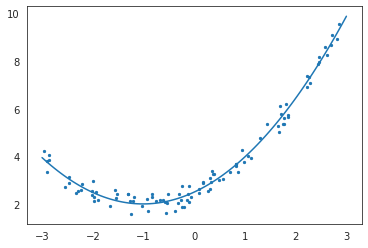

In [ ]:
# 다항회귀 그래프
xx = np.linspace(-3, 3, 100) #X값(-3~3 까지)
y_pred = model_lr.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)
plt.scatter(x, y, s=5)

* 다항회귀는 다수의 항을 이용하여 데이터 분포와 유사한 비선형곡선을 그릴 수 있다.

## 1-3. 규제 선형 모델
ref : https://steadiness-193.tistory.com/262

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV

좋은 회귀 모델을 만들기 위해선 선형 모델의 비용함수(RSS)를 최소화 하면서도 회귀 계수 값이 커지지 않는 균형점을 찾아야한다.

 
그 균형점을 찾기 위한 방법으로 회귀 계수의 크기를 제어하면서 과적합을 개선하기 위해 비용(Cost)함수 목표를 다음과 같이 변경할 수 있다.

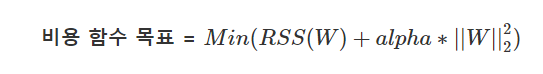

위 수식에서 alpha는 학습 데이터 적합 정도와 회귀 계수의 크기를 제어하는 튜닝 파라미터입니다.

 
위 수식의 최소값을 만족하는 W 벡터를 찾기 위해 alpha 값이 어떤 역할을 하는지 알아보겠습니다.

 
먼저 alpha 값이 0 또는 0에 수렴하는 매우 작은 값이라면 위 수식은 다음과 같이 변합니다.

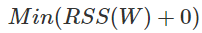

반면 alpha 값이 무한대에 가까운 매우 큰 값이라면 RSS(W)에 비해 아래의 값이 비정상적으로 커지게 됩니다.

따라서 alpha 값을 크게 가져간다면 회귀 계수 W를 작게 가져가는 것으로 과적합을 개선할 수 있으며 alpha 값을 작게 가져가는 경우 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하여 데이터 적합을 개선할 수 있게 됩니다.

 
 
 
이처럼 alhpa 값을 0에서부터 지속적으로 증가시켜 회귀 계수 값의 크기를 감소시키는 것이 가능하며 비용 함수에 alhpa 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방법을 규제(Regularization) 이라고 합니다.

 


### L1 규제 (Lasso)

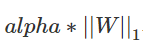

L1 규제는 아래의 식과 같이 W의 절댓값에 대해 패널티를 부여하는 규제 방법으로 <font color='red'><b>영향력이 크지 않은 회귀 계수 값을 0으로 변환</b></font>하며 L1 규제를 적용한 회귀를 <b>라쏘(Lasso) 회귀</b>라 부릅니다.

<img src="https://blog.kakaocdn.net/dn/cWBQwc/btrwnr1fzgg/cV2OdV1f3Z2KLVIiaLKRMk/img.png">

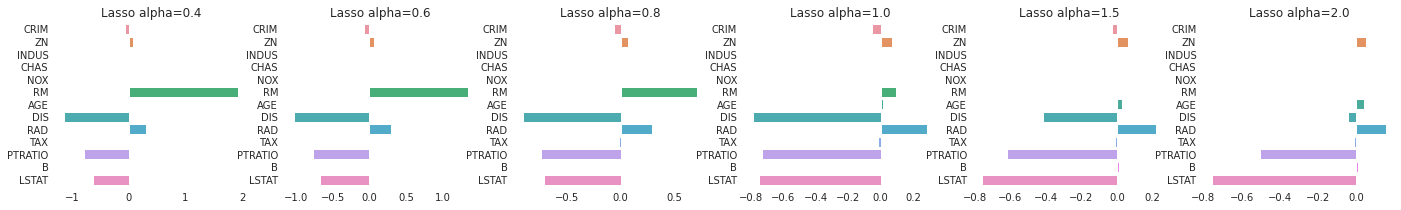

In [ ]:
#규제 정도(alpha값)에 따른 피쳐 중요도 시각화 
from sklearn.model_selection import train_test_split
p, axes = plt.subplots(1,6, figsize=(24,3))
alpha_list=[0.4,0.6,0.8,1.0,1.5,2.0]
y = bostonDF["PRICE"]
X = bostonDF.drop(["PRICE"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)

for i,a in enumerate(alpha_list):
    model=Lasso(alpha=a)
    model.fit(X_train,y_train)
    axes[i].set_title(model.__class__.__name__+ ' alpha='+str(a))
    sns.set_style("white")
    sns.despine(left=True, bottom=True)
    sns.barplot(y=X.columns, x=model.coef_, ax=axes[i])

* L1 규제 정도(alpha값)에 따른 피쳐 중요도(회귀계수) 변화

### L2 규제 (Ridge)

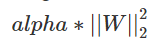

이어서 L2 규제는 아래의 식과 같이 <font color='red'><b>W의 제곱에 대해 패널티를 부여하는 방법</b></font>을 사용하며 L2 규제를 적용한 회귀를 <b>릿지(RIdge) 회귀</b>라 부릅니다.


<img src="https://blog.kakaocdn.net/dn/4jZBq/btrwnquBx1C/vHv81lF4ufP6x2w63fdOJ1/img.png">

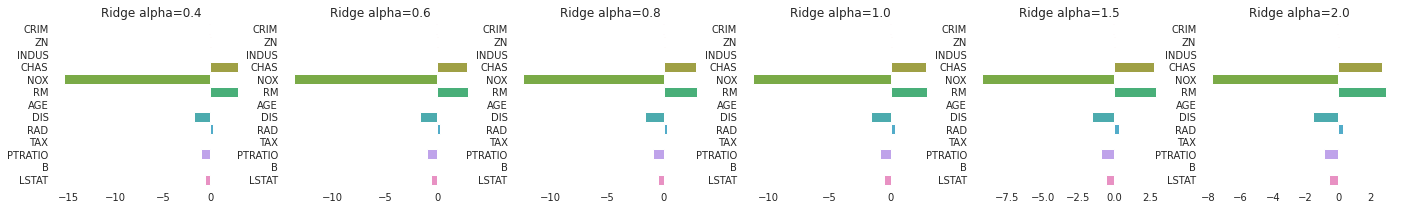

In [ ]:
#규제 정도(alpha값)에 따른 피쳐 중요도 시각화 
p, axes = plt.subplots(1,6, figsize=(24,3))
alpha_list=[0.4,0.6,0.8,1.0,1.5,2.0]
y = bostonDF["PRICE"]
X = bostonDF.drop(["PRICE"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)

for i,a in enumerate(alpha_list):
    model=Ridge(alpha=a)
    model.fit(X_train,y_train)
    axes[i].set_title(model.__class__.__name__+ ' alpha='+str(a))
    sns.set_style("white")
    sns.despine(left=True, bottom=True)
    sns.barplot(y=X.columns, x=model.coef_, ax=axes[i])

* L2 규제 정도(alpha값)에 따른 피쳐 중요도(회귀계수) 변화

<img src="https://blog.kakaocdn.net/dn/6ISEU/btrwnPgxr0g/kRWBKCbUVaQZcBdrNtkxHK/img.png">

## 1-4. 회귀트리
ref : https://velog.io/@sset2323/05-08.-%ED%9A%8C%EA%B7%80-%ED%8A%B8%EB%A6%AC


* 회귀 트리는 회귀 함수(선형회귀의 경우)를 기반으로 하지 않고, 결정 트리와 같이 트리기반으로 한다. 
* 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 하는 것이다. 회귀 트리의 경우 분류 트리와 크게 다르지 않다. 
* 다만 리프 노드에서 예측 결정값을 만드는 과정에 차이가 있다. 
* 분류 트리가 특정 클래스 레이블을 결정하는 것과는 달리 회귀 트리는 리프 노드에 속한 데이터 값의 <b>평균값</b>을 구해 회귀 예측값을 계산한다.

 

### 원리

<img width="500" src="https://blog.kakaocdn.net/dn/no6Ol/btrwqMD1Iqj/7Mqcv7r5kDpWuQhSxkrZK0/img.jpg"></img>

* 편의상 Feature가 하나인 데이터 세트를 2차원(Feature, Target) 그래프로 시각화한다고 가정한다.

<img src="https://blog.kakaocdn.net/dn/27sed/btrwp0vPKYZ/YO5L2ktaTyIxtu3MqzlQtk/img.jpg"></img>

* 이 데이터 세트의 Feature를 결정 트리 기반으로 분할하면, X값의 균일도를 반영한 지니 계수에 따라 그림의 왼쪽과 같이 분할할 수 있다.
* 오른쪽 그림과 같이 루트 노드를 Split 0 기준으로 분할하고 분할된 규칙 노드를 다시 Split 1,2로 분할할 수 있다. 그리고 Split 2는 3로 분할할 수 있다.

<img src="https://blog.kakaocdn.net/dn/xZdD3/btrwwryR437/RYT4E11TAa5wrkCtgZh62K/img.jpg"></img>

* 트리 분할이 완료됐다면 리프 노드에 소속된 데이터 값의 편균값을 구해서 최종적으로 리프 노드에 결정값으로 할당한다.

<img width="400" src=https://blog.kakaocdn.net/dn/cbazlU/btrwsI2bJJJ/SW1NrLzucvqbdQ13W4O240/img.png></img>

* RandomForest, XGB, LGBM 과 같은 모델들이 회귀트리 기반의 모델들이다.

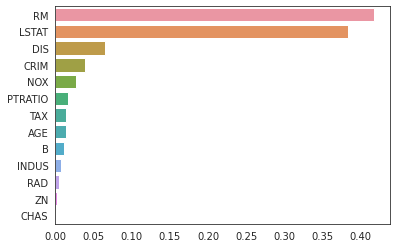

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(bostonDF.drop('PRICE',axis=1), bostonDF['PRICE'])

feature_series = pd.Series(data=rf_reg.feature_importances_, index=bostonDF.drop('PRICE',axis=1).columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

* 회귀 트리 Regressor 클래스는 회귀계수와 편향(절편)을 활용하는 함수를 기반으로 하지 않기 때문에 coef_(회귀계수)는 알 수 없지만, classifier와 동일하게 featureimfortances를 이용해 feature 별 중요도를 알 수 있다.

## 1-5. 다중공선성

* 다중공선성(多重共線性)문제(Multicollinearity)는 통계학의 회귀분석에서 독립변수(Feature)들 간에 강한 상관관계가 나타나는 문제이다.
* 서로 상관성이 높은 Feature들은 회귀 모델 학습에 안 좋은 영향을 미친다.
* 독립변수(Feature) 간 상관관계는 heatmap을 통해 확인 할 수 있다.

### 상관관계 분석

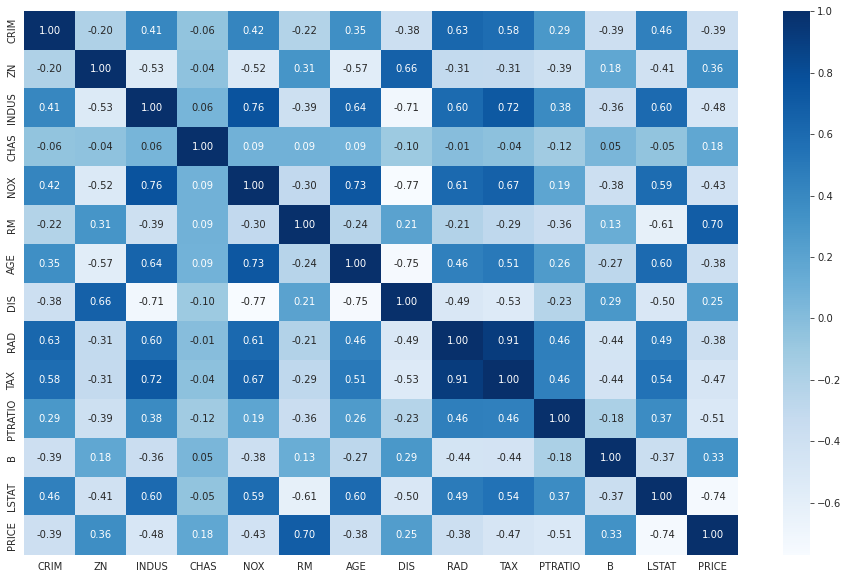

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(bostonDF.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

* 보통 설명변수들간의 상관계수가 0.9 이상이면 다중공선성을 띄고있다고 판단한다.

## 1-6. 회귀 평가 지표
ref : https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-17-%ED%9A%8C%EA%B7%80-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C

* 회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이를 기반으로 한다.
* 회귀 평가지표 MAE, MSE, RMSE, MSLE, RMSLE는 값이 작을수록 회귀 성능이 좋음
* 값이 작을수록 예측값과 실제값의 차이가 없다는 뜻
* R² 는 값이 클수록 성능이 좋습니다. <회귀모델의 설명력>

###MAE (Mean Absolue Error)

*실제 값과 예측 값의 차이를 절댓값으로 변환해 평균한 것

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FMycEv%2Fbtqz6WWhHet%2FyljD5EmxjqE7S9Pdx57yVK%2Fimg.png">

###MSE (Mean Squared Error)

* 실제 값과 예측 값의 차이를 제곱해 평균한 것

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Foithd%2Fbtqz5yoyNoL%2FIuFkyjAuwPY935b4KmYjy0%2Fimg.png">

###RMSE (Root Mean Squared Error)

* MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 쓰는 것입니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbawPPb%2Fbtqz6IcS3PV%2FFh7BJdhJHecO4YRtweLOj1%2Fimg.png">

###MSLE (Mean Squared Log Error)

* MSE에 로그를 적용해준 지표입니다. log(y)가 아니라 log(y+1)입니다. y=0일 때, log(y)는 마이너스 무한대이므로 이를 보정해주기 위해 +1을 한 것입니다. 

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbndFxw%2Fbtqz5yWqJhg%2Fbwbeu20KrRAYbBdw2xBfVK%2Fimg.png">

###RMSLE (Root Mean Squared Log Error)

* RMSE에 로그를 적용해준 지표입니다.

<img width="400" src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fez03Z9%2Fbtqz6g8ZKVe%2FfbRBuBOIcxoUr7KOGnHl81%2Fimg.jpg">

###R² (R Sqaure)

* R² 는 분산 기반으로 예측 성능을 평가합니다. 1에 가까울수록 예측 정확도가 높습니다.

* R² = 예측값 Variance / 실제값 Variance

### 예시코드

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

origin = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7])
pred = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7])

MAE =  mean_absolute_error(origin, pred)
print("MAE : ",MAE)
MSE = mean_squared_error(origin, pred)
print("MSE : ",MSE)
RMSE = np.sqrt(MSE)
print("RMSE : ",RMSE)
MSLE = mean_squared_log_error(origin, pred)
print("MSLE : ",MSLE)
RMSLE = np.sqrt(mean_squared_log_error(origin, pred))
print("RMSLE : ",RMSLE)
R2 = r2_score(origin, pred)
print("R2 : ",R2)

MAE :  0.45454545454545453
MSE :  0.45454545454545453
RMSE :  0.674199862463242
MSLE :  0.029272467607503513
RMSLE :  0.1710919858073531
R2 :  0.868421052631579


# 2. 회귀분석 모델 설명 및 코드

## 2-1. Linear Regression <선형회귀>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear#sklearn.linear_model.LinearRegression

### API
<img src="https://blog.kakaocdn.net/dn/Ee7JG/btrwkvJNF80/JEkRlREuwVuSbRmwCwpc40/img.png"></img>

### 파라미터 설명
* fit_intercept : bool, default=True
    - 회귀 모델의 절편(상수값)을 계산할지 여부. False로 설정하면 계산에 절편이 사용되지 않음(즉, 데이터가 중앙에 위치할 것으로 예상됨).

* normalize : bool, default=False
    - 정규화 여부, 1.2 버전부터 삭제

* copy_X : bool, default=True
    - 입력 데이터의 복사 여부. False 시, 데이터의 평균을 원점(0)에 맞춤

* n_jobs : int, default=None
    - 데이터 분석에 사용될 코어의 개수 (-1 입력 시 사용 가능한 모든 코어 사용)

* positive : bool, default=False
    - True 입력 시 회귀계수가 양수(+)가 됨

### 예시코드(활용 예시)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1)
#데이터셋 나누기(train, test)
X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)
#모델 사용
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [ ]:
# 평가 지표 확인
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R2 Score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 28.406, RMSE : 5.330
R2 Score : 0.649


In [ ]:
#절편값 구하기 (lr.intercept_)
print('절편 값:',lr.intercept_)
#회귀계수값 구하기 (lr.ceof_)
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff

절편 값: 28.981270388095602


CRIM       -0.1
ZN          0.0
INDUS       0.1
CHAS        0.3
NOX       -14.3
RM          4.8
AGE        -0.0
DIS        -1.3
RAD         0.3
TAX        -0.0
PTRATIO    -1.0
B           0.0
LSTAT      -0.5
dtype: float64

## 2-2. PolynomialFeatures <다항회귀>
* ref : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures

### API
<img src="https://blog.kakaocdn.net/dn/brRspG/btrwnqVs3cY/jT1wNLT1rVkiYUpGEwn590/img.png"></img>

### 파라미터 설명
* degree : int or tuple (min_degree, max_degree), default=2
    - 다항식 차수 결정

* interaction_only : bool, default=False
    - True 시, 다른 Feature와 상호작용하는 Feature만 생성, 즉 제곱 혹은 세제곱 등 같은 제곱항 제외
포함: x[0], x[1], x[0] * x[1], etc.<br>
제외: x[0] ** 2, x[0] ** 2 * x[1], etc.

* include_bias : bool, default=True
    - 절편 포함여부
* order : {‘C’, ‘F’}, default=’C’
    - 출력 배열 순서 (그냥 default 씁시다)

### 예시코드(활용 예시)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False) # 기본 다항식형태를 만들고
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_train_poly
# 새롭게 정의된 numpy 배열은 행별로 각 데이터를 다항 형태로 변형해준다.

array([[2.21880000e-01, 2.00000000e+01, 6.96000000e+00, ...,
        1.52701193e+05, 2.57126660e+03, 4.32964000e+01],
       [5.36000000e-02, 2.10000000e+01, 5.64000000e+00, ...,
        1.57529610e+05, 2.09563200e+03, 2.78784000e+01],
       [6.88800000e-02, 0.00000000e+00, 2.46000000e+00, ...,
        1.57529610e+05, 3.75070500e+03, 8.93025000e+01],
       ...,
       [3.51140000e-01, 0.00000000e+00, 7.38000000e+00, ...,
        1.57529610e+05, 3.05613000e+03, 5.92900000e+01],
       [9.18702000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        1.57529610e+05, 9.36684000e+03, 5.56960000e+02],
       [4.55587000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        1.25812090e+05, 2.52546400e+03, 5.06944000e+01]])

* PolynomialFeatures함수를 통해 현재 데이터를 다항식 형태로 변경한다. (각 특성의 제곱 혹은 그 이상을 추가)
* degree 옵션으로 차수를 조절한다.
* include_bias 옵션은 True로 할 경우 0차항(1)도 함께 만든다.
* 이렇게 만들어진 다항식 모델에 x를 fit transform하여 새로운 데이터를 생성한다.

In [ ]:
np.array(X_train.iloc[0,:]), X_train_poly[0]

(array([2.2188e-01, 2.0000e+01, 6.9600e+00, 1.0000e+00, 4.6400e-01,
        7.6910e+00, 5.1800e+01, 4.3665e+00, 3.0000e+00, 2.2300e+02,
        1.8600e+01, 3.9077e+02, 6.5800e+00]),
 array([2.21880000e-01, 2.00000000e+01, 6.96000000e+00, 1.00000000e+00,
        4.64000000e-01, 7.69100000e+00, 5.18000000e+01, 4.36650000e+00,
        3.00000000e+00, 2.23000000e+02, 1.86000000e+01, 3.90770000e+02,
        6.58000000e+00, 4.92307344e-02, 4.43760000e+00, 1.54428480e+00,
        2.21880000e-01, 1.02952320e-01, 1.70647908e+00, 1.14933840e+01,
        9.68839020e-01, 6.65640000e-01, 4.94792400e+01, 4.12696800e+00,
        8.67040476e+01, 1.45997040e+00, 4.00000000e+02, 1.39200000e+02,
        2.00000000e+01, 9.28000000e+00, 1.53820000e+02, 1.03600000e+03,
        8.73300000e+01, 6.00000000e+01, 4.46000000e+03, 3.72000000e+02,
        7.81540000e+03, 1.31600000e+02, 4.84416000e+01, 6.96000000e+00,
        3.22944000e+00, 5.35293600e+01, 3.60528000e+02, 3.03908400e+01,
        2.08800000e+01, 1.

* fit_transform을 통해 위와 같이 각 피쳐를 곱한 항을 추가하여 반환한다. (a²,ab,ac,ac ..., b²,bc,bd, ...)

In [ ]:
from sklearn.linear_model import LinearRegression
# model.coef_, model.intercept_
lr = LinearRegression()
lr.fit(X_train_poly, y_train) # 다항회귀 모델에 그렇게 변형한 데이터와 기존 y값을 넣고 학습시킨다.
y_preds = lr.predict(X_test_poly)


In [ ]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R스퀘어 (결정계수) : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 18.871, RMSE : 4.344
R스퀘어 (결정계수) : 0.767



* 선형회귀 모델을 만들고, 다항화한 x의 데이터와 기존의 y값을 모델에 fit시켜준다.
* 이를 통해 모델이 완성되었고 이를 활용할 수도 있다.

## 2-3. Ridge regression <릿지회귀 - 규제>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge

### API
<img src="https://blog.kakaocdn.net/dn/dhrxxJ/btrwrImPw5i/Ftb6hEgSxS0Na9pLizWfaK/img.png"></img>

### 파라미터 설명
* alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    -  하이퍼파라미터인 α는 모델을 얼마나 많이 규제할지 조절한다.
α=0이면 선형회귀와 같아지고, α가 커질수록 모든 가중치가 0에 가까워져 결국 데이터의 평균을 지나는 수평선이 된다.


### 예시코드(활용 예시)

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1)
#데이터셋 나누기(train, test)
X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)
#모델 사용
model = Ridge(alpha=1.0, random_state = 1234)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [ ]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R스퀘어 (결정계수) : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 29.158, RMSE : 5.400
R스퀘어 (결정계수) : 0.639


## 2-4. Lasso regression <라쏘회귀 - 규제>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso

### API
<img src="https://blog.kakaocdn.net/dn/bTRYDW/btrwonqpM2O/8DJlYEpwe1jEcfRNkOc2c1/img.png"></img>


### 파라미터 설명
* alpha : float, default=1.0
    - 하이퍼파라미터인 α는 모델을 얼마나 많이 규제할지 조절한다.
α=0이면 선형회귀와 같아지고, α가 커질수록 모든 가중치가 0에 가까워져 결국 데이터의 평균을 지나는 수평선이 된다.

### 예시코드(활용 예시)

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1)
#데이터셋 나누기(train, test)
X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)
#모델 사용
model = Lasso(alpha=1.0, random_state = 1234)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [ ]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R스퀘어 (결정계수) : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 29.122, RMSE : 5.397
R스퀘어 (결정계수) : 0.640


## 2-5. Elastic-net <엘라스틱 넷 - 규제>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html?highlight=elastic#sklearn.linear_model.ElasticNet
* 엘라스틱 넷(Elastic Net)은 릿지회귀와 라쏘회귀를 절충한 모델이다.
* 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 두 규제항의 혼합정도를 혼합비율 r을 사용해 조절한다.

### API
<img src="https://blog.kakaocdn.net/dn/cGSxOt/btrwmqOqsEP/l5uuo8qCJ5mpARl24KOpx0/img.png"></img>

### 파라미터 설명
* alpha : float, default=1.0
    - 하이퍼파라미터인 α는 모델을 얼마나 많이 규제할지 조절한다.
α=0이면 선형회귀와 같아지고, α가 커질수록 모든 가중치가 0에 가까워져 결국 데이터의 평균을 지나는 수평선이 된다.

* l1_ratio : float, default=0.5
    - Lasso, Ridge의 비율로, l1_ratio가 0이면 Ridge(L2 규제)와 동일하고, l1_ratio가 1이면 Lasso(L1 규제)와 동일하다.


### 예시코드(활용 예시)

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1)
#데이터셋 나누기(train, test)
X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)
#모델 사용
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state = 1234)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [ ]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R스퀘어 (결정계수) : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 28.840, RMSE : 5.370
R스퀘어 (결정계수) : 0.643


## 2-6. Random Forest regression <랜덤포레스트 회귀 - 회귀트리>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor

### API
<img src="https://blog.kakaocdn.net/dn/VXFl7/btrwptKJXN7/qL2xJqZRlyLuIXEQlKIMK0/img.png"></img>

### 파라미터 설명
* n_estimators : int, default=100
    - 랜덤 포레스트 안의 결정 트리 갯수
    - n_estimators는 클수록 좋음
    - 결정 트리가 많을수록 더 깔끔한 Decision Boundary가 나오지만 그만큼 메모리와 훈련 시간이 증가
* max_depth : int, default=None
    - max_depth 는 루트 노드와 리프 노드 사이의 최대 거리
* min_samples_split : int or float, default=2
    - 트리에 주어진 노드를 분할하기 위해 필요한 최소 관찰 수
* min_samples_leaf : int or float, default=1
    - 노드 를 분할 한 후 리프 노드에 있어야하는 최소 샘플 수
* max_features : {“auto”, “sqrt”, “log2”}, int or float, default=”auto”
    - 무작위로 선택할 Feature의 개수
    - max_features=n_features이면 모든 feature로 결정 트리를 만든다.
단
    - bootstrap=True이면 복원 추출로 feature를 뽑는다.
    - max_features 값이 크다면 랜덤 포레스트의 트리들이 매우 비슷해지고, 가장 두드러진 특성에 맞게 예측을 할 것임
    - max_features 값이 작다면 랜덤 포레스트의 트리들이 서로 매우 달라져서 오버피팅이 줄어듬
    - max_features는 일반적으로 Defalut 값 사용
* max_leaf_nodes : int, default=None
    - 리프노드의 최대 개수

### 예시코드(활용 예시)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1)
#데이터셋 나누기(train, test)
X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)
#모델 사용
model = RandomForestRegressor(n_estimators=100,
                              max_depth=None, min_samples_split=2, min_samples_leaf=1,
                              max_features='auto', max_leaf_nodes=None, bootstrap=True,
                              random_state = 1234)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [ ]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R스퀘어 (결정계수) : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 14.450, RMSE : 3.801
R스퀘어 (결정계수) : 0.821


## 2-7. Extreme Gradient Boosting regression <XGB - 회귀트리>
* ref: https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn
* 파라미터 ref: https://dining-developer.tistory.com/4

### API

### 파라미터 설명
* booster,  기본값 : gbtree
    - 어떤 부스터를 쓸지 고른다. [gbtree, gblinear, dart] 중 하나
* learning_rate, 기본값 : 0.3 / 범위 : [0,1] 
    - 학습률. 낮은 값일수록 모델이 견고해지고 오버 피팅 방지에 좋다.
    - 일반적으로 0.01 ~ 0.3 정도로 설정하는데, 제한된 리소스를 가진 기계에 모델을 올려야 할 경우 Step 수를 줄이기 위해 0.9까지 올려 모델 크기를 최소화한 적도 있다. 일반적인 상황이라면 권장하지 않는다.
* gamma [alias: min_split_loss], 기본값 : 0 / 범위 : [0,∞]
    - 이전 글에서 언급한 gain 값이 gamma 이상일 경우 자식 노드를 생성하도록 한다.
    - Overfitting 방지에 좋으나 너무 높으면 underfitting 이 생길 수가 있음.
    - lambda, alpha 값에도 영향을 받기 때문에, 파라미터 튜닝 시 세 가지를 동시에 바꿔가며 grid search를 하는 편
* max_depth, 기본값 : 6 / 범위 : [0,∞]
    - 최대 트리의 깊이. N이라고 가정하면 2^N개의 리프 노드가 생긴다. 10일 때 최대 1024개의 리프 노트가 생긴다.
    - 일반적으로 Feature 수에 따라 3~6으로 세팅한 후 성능이 증가하고, 오버 피팅이 나지 않을 때까지 늘려간다.
    - 제한된 리소스에 모델을 올려야 할 경우 울며 겨자 먹기로 약간의 성능을 포기하고 depth를 줄이기도 한다.
* subsample, 기본값 : 1 범위: [0,1]
    - 각각의 스탭마다 사용할 샘플의 비율. 1 이하의 값을 사용하면 오버 피팅을 방지할 수 있다.
    - 개인적으로 cross validation을 주로 쓴다면 크게 중요한 파라미터가 아닌 것 같다.
* colsample_bytree, 기본값 : 1 / 범위 : [0,1]
    - 각각의 트리(스탭)마다 사용할 칼럼(Feature)의 비율
    - 개인적으로 colsample_* 파라미터 둘 중에 가장 효과가 좋은 것 같음.
* colsample_bylevel, 기본값 : 1 / 범위 : [0,1]
    - 각각의 트리 depth 마다 사용할 칼럼(Feature)의 비율
* colsample_bynode, 기본값 : 1 / 범위 : [0,1]
    - 각각의 노드 depth 마다 사용할 칼럼(Feature)의 비율
    - colsample_bylevel와 비슷해 보이지만 이 경우 좌, 우 리프 노드가 서로 다른 feature를 사용하게 된다.
* reg_lambda, 기본값 : 1 / 범위 : [0,∞]
    - L2 정규화(규제) 파라미터이다.
    - 커질수록 보수적인 모델을 생성하고 오버 피팅을 방지해준다. 지나치게 클 경우 언더 피팅이 난다. 
    - 너무 큰 가중치를 그 크기에 비례하여 줄여준다.
    - noise나 outlier 같은 애들이나 너무 크게 튀는 데이터들을 어느 정도 잡아준다고 보면 된다. 
    - gamma, alpha와 함께 튜닝함.
* reg_alpha, 기본값 : 0 / 범위: [0,∞]
    - L1 정규화(규제) 파라미터이다.
    - 커질수록 보수적인 모델을 생성하고 오버 피팅을 방지해준다.
    - 불필요한 가중치를 0으로 만들어서 무시하도록 한다. 
    - sparse feature 가 있거나 feature수가 지나치게 많을 때 효과적이다.
    - gamma, lambda와 함께 튜닝함.
* scale_pos_weight, [default=1]
    - 데이터 클래스(레이블) 불균형이 있을 때 레이블 가중치를 조절해주는 파라미터
    - 권장 값 : sum(negative instances) / sum(positive instances)
    - 굉장히 중요한 파라미터. 데이터 불균형이 심한 경우 꼭 설정해주는 게 좋다.




### 예시코드(활용 예시)


In [ ]:
from xgboost import XGBRegressor
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1)
#데이터셋 나누기(train, test)
X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)
#모델 사용
model = XGBRegressor(booster='gbtree',learning_rate=0.3, gamma=0,
                     max_depth=6, subsample=1, colsample_bytree=1,
                     colsample_bylevel=1, colsample_bynode=1,
                     reg_lambda=1, reg_alpha=1, scale_pos_weight=1)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

[14:11:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R스퀘어 (결정계수) : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 13.176, RMSE : 3.630
R스퀘어 (결정계수) : 0.837


## 2-8. Light Gradient Boosting regression <LGBM - 회귀트리>
ref: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

### API

<img src="https://blog.kakaocdn.net/dn/cu1uhp/btrwsIBaDcb/vVIlKvtoA9skj5Qs1eK3Hk/img.png"></img>

### 파라미터 설명



* boosting_type (str, optional (default='gbdt'))
    - 실행하고자 하는 알고리즘 타입을 정의합니다. 디폴트값은 gdbt 입니다.
    - gdbt : Traditional Gradient Boosting Decision Tree
    - rf : Random Forest
    - dart : Dropouts meet Multiple Additive Regression Trees
    - goss : Gradient-based One-Side Sampling

* learning_rate (float, optional (default=0.1))
    - 최종 결과에 대한 각각의 Tree에 영향을 미치는 변수입니다. 
    - GBM은 초기의 추정값에서 시작하여 각각의Tree 결과를 사용하여 추정값을 업데이트 합니다. 
    - 학습 파라미터는 이러한 추정에서 발생하는 변화의 크기를 컨트롤합니다. 일반적인 값은 0.1, 0.001, 0.003 등등이 있습니다.

* num_leaves (int, optional (default=31)) 
    - 전체 Tree의 leave 수 이고, 디폴트값은 31입니다.

* max_depth (int, optional (default=-1))
    - Tree의 최대 깊이를 말합니다. 이 파라미터는 모델 과적합을 다룰 때 사용됩니다. 
    - 만약 여러분의 모델이 과적합된 것 같다고 느끼신다면 제 조언은 max_depth 값을 줄이라는 것입니다.

* n_estimators (int, optional (default=100)) 
    - 부스팅 모델 안의 결정 트리 갯수
* subsample (float, optional (default=1.))
    - 각각의 스탭마다 사용할 샘플의 비율. 1 이하의 값을 사용하면 오버 피팅을 방지할 수 있다.

* colsample_bytree (float, optional (default=1.))
    - 각각의 트리(스탭)마다 사용할 칼럼(Feature)의 비율

* reg_lambda (float, optional (default=0.))
    - L2 정규화(규제) 파라미터이다.
    - 커질수록 보수적인 모델을 생성하고 오버 피팅을 방지해준다. 지나치게 클 경우 언더 피팅이 난다.
    - 너무 큰 가중치를 그 크기에 비례하여 줄여준다.
    - noise나 outlier 같은 애들이나 너무 크게 튀는 데이터들을 어느 정도 잡아준다고 보면 된다.
* reg_alpha (float, optional (default=0.))
    - L1 정규화(규제) 파라미터이다.
    - 커질수록 보수적인 모델을 생성하고 오버 피팅을 방지해준다.
    - 불필요한 가중치를 0으로 만들어서 무시하도록 한다.
    - sparse feature 가 있거나 feature수가 지나치게 많을 때 효과적이다.


### 예시코드(활용 예시)

In [ ]:
from lightgbm import LGBMRegressor
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1)
#데이터셋 나누기(train, test)
X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)
#모델 사용
model = LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1,
                      n_estimators=100, subsample=1.0, subsample_freq=0, colsample_bytree=1.0,
                      reg_alpha=0.0, reg_lambda=0.0, random_state=1234)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [ ]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R스퀘어 (결정계수) : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 17.113, RMSE : 4.137
R스퀘어 (결정계수) : 0.788


## 2-9. Catboost regression <Catboost - 회귀트리>
ref : https://catboost.ai/en/docs/concepts/python-reference_catboostregressor
* api 사이트만으로는 default값 확인불가로 파이참으로 api확인 후 작성 예정 

### API

### 파라미터 설명

### 예시코드(활용 예시)

# 3. pycaret을 통한 모델 성능비교
* 데이터의 유형 혹은 파생변수에 따라서 모델의 성능이 다르다.
* pycaret의 AUTO ML을 통해 빠르게 여러 모델의 성능을 확인할 수 있다.
* pycaret을 통해 모델을 선정하고, 파라미터 튜닝 혹은 앙상블하여 유의미하게 활용할 수 있다.
* pycaret은 모델 성능 참고용으로 활용하고 튜닝, 앙상블은 사람이 직접하는 것이 좋다 (튜닝의 경우 pycaret보다 optuna 성능이 뛰어남) 

# 4. 회귀모델 `import` 모음


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
